<br><h1> <img src="https://serea2017.uniandes.edu.co/images/Logo.png" height="120" width="400" align="Center" /><br>

 

# MIIIA Advanced Models: Exercise 15 - 12 Jul 2020

 

                         Names                 User                Code
           - Romero Fonseca Angela Fernanda       af.romerof     201819276       
           - Alzate Roman Cindy Zulima            c.alzate       201920019
           - Rojas Arcila Daniel Camilo           d.rojasa       201924286
           - Elquin Huertas Ramírez               e.huertas      201920061

# Exercise 14

## Predict rating using LSTM


In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
dataTraining = pd.read_csv('https://github.com/albahnsen/AdvancedMethodsDataAnalysisClass/raw/master/datasets/dataTraining.zip', encoding='UTF-8', index_col=0)

In [3]:
dataTraining.head()

,year,title,plot,genres,rating
3107,2003,Most,most is the story of a single father who takes...,"['Short', 'Drama']",8.0
900,2008,How to Be a Serial Killer,a serial killer decides to teach the secrets o...,"['Comedy', 'Crime', 'Horror']",5.6
6724,1941,A Woman's Face,"in sweden , a female blackmailer with a disfi...","['Drama', 'Film-Noir', 'Thriller']",7.2
4704,1954,Executive Suite,"in a friday afternoon in new york , the presi...",['Drama'],7.4
2582,1990,Narrow Margin,"in los angeles , the editor of a publishing h...","['Action', 'Crime', 'Thriller']",6.6


In [4]:
plots = dataTraining['plot']
y = (dataTraining['rating'] >= dataTraining['rating'].mean()).astype(int)

In [5]:
plots

3107    most is the story of a single father who takes...
900     a serial killer decides to teach the secrets o...
6724    in sweden ,  a female blackmailer with a disfi...
4704    in a friday afternoon in new york ,  the presi...
2582    in los angeles ,  the editor of a publishing h...
                              ...                        
8417    " our marriage ,  their wedding .  "  it ' s l...
1592    the wandering barbarian ,  conan ,  alongside ...
1723    like a tale spun by scheherazade ,  kismet fol...
7605    mrs .  brisby ,  a widowed mouse ,  lives in a...
215     tinker bell journey far north of never land to...
Name: plot, Length: 7895, dtype: object

In [6]:
plots[0]

"major benson winifred payne is being discharged from the marines .  payne is a killin '  machine ,  but the wars of the world are no longer fought on the battlefield .  a career marine ,  he has no idea what to do as a civilian ,  so his commander finds him a job  -  commanding officer of a local school ' s jrotc program ,  a bunch or ragtag losers with no hope .  using such teaching tools as live grenades and real bullets ,  payne starts to instill the corp with some hope .  but when payne is recalled to fight in bosnia ,  will he leave the corp that has just started to believe in him ,  or will he find out that killin '  ain ' t much of a livin '  ?"

In [7]:
y

3107    1
900     0
6724    1
4704    1
2582    1
       ..
8417    0
1592    0
1723    0
7605    1
215     1
Name: rating, Length: 7895, dtype: int64

# Exercise 14.1

- Remove stopwords 
- Lowercase
- split the text in words 
- pad_sequences

In [8]:
# Dividiendo por palabras
voc = set((''.join(plots)).split())
list(voc)[:10]

['behaviour',
 'reconnection',
 'buildings',
 'wicked',
 'pessimistic',
 'cloak',
 'kilbourne',
 'uncorrupted',
 'kuman',
 '.animals']

In [9]:
#pip install NLTK
import nltk
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [10]:
# filter out stop words
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))
words = [w for w in voc if not w in stop_words]
print(words[:100])

['behaviour', 'reconnection', 'buildings', 'wicked', 'pessimistic', 'cloak', 'kilbourne', 'uncorrupted', 'kuman', '.animals', 'donahue', 'jarrah', 'disaffected', 'crosby', 'baldessari', 'stones', 'nigel', 'vintage', '.egbert', 'anders', 'johan', 'dodson', 'blessington', 'parador', 'identifiable', 'stone', 'dwell', 'suzette', 'ya', 'diners', 'kona', 'layton', 'collector', 'aviv', 'maintains', 'crisscrossed', 'bereft', 'bros', 'assertion', 'suns', 'cavaldi', 'jute', 'lectured', 'seraph', '.early', 'torturous', 'sarrazin', 'wandrous', 'geekiest', 'sowell', 'luthan', 'barnes', 'batiatus', 'referee', 'zoey', 'catatonic', 'bubber', 'retrospective', 'unaccountable', 'f%&', 'facets', 'strays', '.mickey', 'seers', 'bounding', 'brecht', 'exes', 'hauled', 'clinical', 'trina', 'guns', 'benyon', 'cooties', '.civilization', 'rowena', 'kublai', 'years', 'concentration', 'gibney', 'mice', 'kinjanja', 'comply', 'occasionally', '.bond', 'chemisty', 'dynasty', 'hitting', 'pocketknife', 'far', 'lem', 'ove

In [11]:
# Quitar los signos de puntuación
import string
table = str.maketrans('', '', string.punctuation)
stripped = [w.translate(table) for w in words]
print(stripped[:100])

['behaviour', 'reconnection', 'buildings', 'wicked', 'pessimistic', 'cloak', 'kilbourne', 'uncorrupted', 'kuman', 'animals', 'donahue', 'jarrah', 'disaffected', 'crosby', 'baldessari', 'stones', 'nigel', 'vintage', 'egbert', 'anders', 'johan', 'dodson', 'blessington', 'parador', 'identifiable', 'stone', 'dwell', 'suzette', 'ya', 'diners', 'kona', 'layton', 'collector', 'aviv', 'maintains', 'crisscrossed', 'bereft', 'bros', 'assertion', 'suns', 'cavaldi', 'jute', 'lectured', 'seraph', 'early', 'torturous', 'sarrazin', 'wandrous', 'geekiest', 'sowell', 'luthan', 'barnes', 'batiatus', 'referee', 'zoey', 'catatonic', 'bubber', 'retrospective', 'unaccountable', 'f', 'facets', 'strays', 'mickey', 'seers', 'bounding', 'brecht', 'exes', 'hauled', 'clinical', 'trina', 'guns', 'benyon', 'cooties', 'civilization', 'rowena', 'kublai', 'years', 'concentration', 'gibney', 'mice', 'kinjanja', 'comply', 'occasionally', 'bond', 'chemisty', 'dynasty', 'hitting', 'pocketknife', 'far', 'lem', 'overextende

In [12]:
# Dejando todo en minúsculas
lower_c = [w.lower() for w in stripped]
print(lower_c[:100])

['behaviour', 'reconnection', 'buildings', 'wicked', 'pessimistic', 'cloak', 'kilbourne', 'uncorrupted', 'kuman', 'animals', 'donahue', 'jarrah', 'disaffected', 'crosby', 'baldessari', 'stones', 'nigel', 'vintage', 'egbert', 'anders', 'johan', 'dodson', 'blessington', 'parador', 'identifiable', 'stone', 'dwell', 'suzette', 'ya', 'diners', 'kona', 'layton', 'collector', 'aviv', 'maintains', 'crisscrossed', 'bereft', 'bros', 'assertion', 'suns', 'cavaldi', 'jute', 'lectured', 'seraph', 'early', 'torturous', 'sarrazin', 'wandrous', 'geekiest', 'sowell', 'luthan', 'barnes', 'batiatus', 'referee', 'zoey', 'catatonic', 'bubber', 'retrospective', 'unaccountable', 'f', 'facets', 'strays', 'mickey', 'seers', 'bounding', 'brecht', 'exes', 'hauled', 'clinical', 'trina', 'guns', 'benyon', 'cooties', 'civilization', 'rowena', 'kublai', 'years', 'concentration', 'gibney', 'mice', 'kinjanja', 'comply', 'occasionally', 'bond', 'chemisty', 'dynasty', 'hitting', 'pocketknife', 'far', 'lem', 'overextende

In [13]:
# Codificando las palabras VOC
vocabulary = {x: idx + 1 for idx, x in enumerate(set(lower_c))}

In [14]:
max_plot_len = 500
#X = [x.split() for x in plot2]
#len_ = pd.Series([len(x)for x in plots])

X = [x[:max_plot_len] for x in plots]

# Convert words to int and pad
X = [[vocabulary[x1] for x1 in x if x1 in vocabulary.keys()] for x in plots]

In [15]:
from keras.preprocessing import sequence
X_pad = sequence.pad_sequences(X, maxlen = max_plot_len)
X_pad

Using TensorFlow backend.


array([[36218, 32039, 15386, ..., 18276, 14851,  2855],
       [    0,     0,     0, ..., 36218, 32039,  6989],
       [15386, 36218, 16216, ...,  8911, 36218, 15386],
       ...,
       [    0,     0,     0, ...,  6160,  2407, 16216],
       [35793,  6160,  2407, ..., 38053, 21362, 36218],
       [    0,     0,     0, ..., 32039, 36218, 36218]], dtype=int32)

In [ ]:
# Validando el último código de la matriz eXpad que es un signo de puntuación. se removerá
# print([key for key in vocabulary.keys()][91])
# print([value for value in vocabulary.values()][91])

# Exercise 14.2

Create a LSTM neural network to predict the rating of a movie

Calculate the testing set accuracy

In [16]:
import keras
from keras import backend as K

In [17]:
from keras.models import Sequential
from keras.layers.recurrent import LSTM
from keras.layers.core import Dense, Dropout
from keras.layers.embeddings import Embedding
from keras.preprocessing import sequence

In [18]:
!pip install livelossplot

In [19]:
from livelossplot import PlotLossesKeras
%matplotlib inline

In [20]:
import sklearn as sklearn
from sklearn.model_selection  import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_pad, y, test_size=0.33, random_state=42)

In [21]:
model = Sequential()
model.add(Embedding(len(vocabulary) + 1, max_plot_len, input_length=max_plot_len))
model.add(LSTM(32))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='rmsprop', metrics=['accuracy'])

model.summary()        

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 500, 500)          19349000  
_________________________________________________________________
lstm_1 (LSTM)                (None, 32)                68224     
_________________________________________________________________
dropout_1 (Dropout)          (None, 32)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 33        
Total params: 19,417,257
Trainable params: 19,417,257
Non-trainable params: 0
_________________________________________________________________


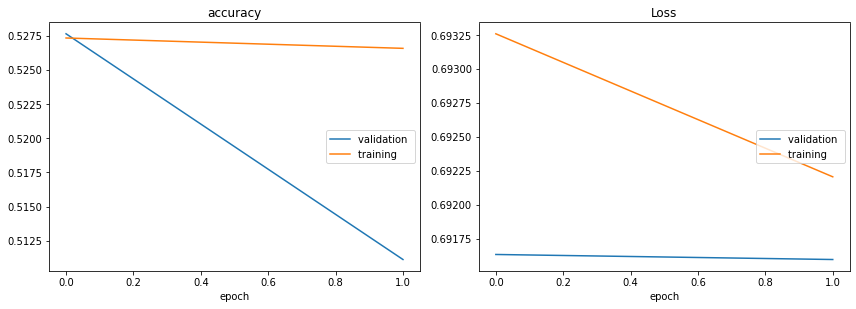

accuracy
	validation       	 (min:    0.511, max:    0.528, cur:    0.511)
	training         	 (min:    0.527, max:    0.527, cur:    0.527)
Loss
	validation       	 (min:    0.692, max:    0.692, cur:    0.692)
	training         	 (min:    0.692, max:    0.693, cur:    0.692)


In [22]:
model.fit(X_train, y_train, validation_data=[X_test, y_test], 
          batch_size=50, epochs=2, verbose=1,
          callbacks=[PlotLossesKeras()])

In [23]:
y_pred = model.predict_classes(X_test)[:,0]
print((y_pred == y_test).mean())

0.511128165771297


**Conclusión**  
Luego de realizar varias modificaciones en los parámetros de la red neuronal, se encontró esta solución con un accuracy de 51,11%.